In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


oil_prices = pd.read_csv("DCOILWTICO.csv", sep=",")
covid_data = pd.read_csv("national-history.csv")

# We will use DATE and PRICES from the first data
# We will only use date and positiveIncrease columns from the second csv file

#Sorting the data with date
covid_data['date'] = pd.to_datetime(covid_data['date'], infer_datetime_format= True)
covid_data.sort_values(by = 'date', ascending = True, inplace = True) 


oil_prices['date'] = pd.to_datetime(oil_prices.date)

#merge datasets
merged_data = pd.merge(oil_prices, covid_data)
merged_data.head(10)

,date,prices,death,deathIncrease,inIcuCumulative,inIcuCurrently,hospitalizedIncrease,hospitalizedCurrently,hospitalizedCumulative,negative,negativeIncrease,onVentilatorCumulative,onVentilatorCurrently,positive,positiveIncrease,states,totalTestResults,totalTestResultsIncrease
0,2020-01-13,58.17,NaN,0,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,1,0,0
1,2020-01-14,58.34,NaN,0,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,0.0,0,1,0,0
2,2020-01-15,57.86,NaN,0,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,0.0,0,1,0,0
3,2020-01-16,58.52,NaN,0,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,0.0,0,1,0,0
4,2020-01-17,58.55,NaN,0,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,0.0,0,1,0,0
5,2020-01-21,58.25,NaN,0,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,2.0,1,1,0,0
6,2020-01-22,56.76,NaN,0,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,2.0,0,2,1,1
7,2020-01-23,55.51,NaN,0,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,2.0,0,2,2,1
8,2020-01-24,54.09,NaN,0,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,2.0,0,2,2,0
9,2020-01-27,53.09,NaN,0,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,2.0,0,3,3,1


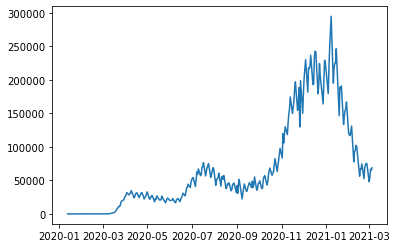

In [68]:
x = merged_data["date"]
y = merged_data["positiveIncrease"]

plt.plot(x, y)
plt.show()